In [7]:
import psiresp

[ s for s in  psiresp.Molecule.__dict__.keys() if s.startswith('from')]  

['from_smiles', 'from_rdkit']

In [10]:
from prep import build_molecule_from_smiles
smile = "C[C@](CCCC=C)(C(=O)O)NC(=O)"
mol = build_molecule_from_smiles(smile)

psirespmol = psiresp.Molecule.from_rdkit(mol)
psirespmol 


Treating your molecule as a  residue
[1, 7, 8, 10]


In [41]:
from rdkit import Chem
import prep
patt_backbone = Chem.MolFromSmarts("C(C=O)N")
mol = build_molecule_from_smiles(smiles)
mol.GetSubstructMatch(patt_backbone)

#[atom.GetSymbol() for atom in mol.GetAtoms()]
[ at.for at in mol.GetAtoms()] 

Treating your molecule as a  residue
[1, 7, 8, 11]


AttributeError: 'Atom' object has no attribute 'index'

In [92]:
for at in [1,2,3] : 
    mol.GetAtomsWithIndx(at).GetSymbol()
    mol.GetAtomsWithIndx(at).GetHybridization()=="SP2"

#fragment_the_molecule:
mol1_f = Chem.FragmentOnBonds(mol1, (1,3))

AttributeError: 'Mol' object has no attribute 'GetAtomsWithIndx'

[6, 7, 10]


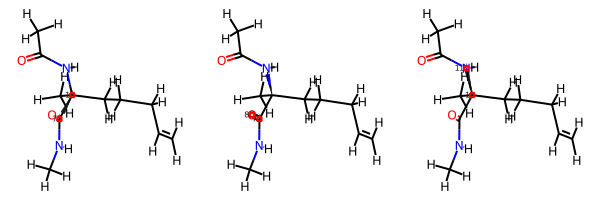

In [66]:
def get_match_bond_indices(query, mol, match_atom_indices):
    bond_indices = []
    for query_bond in query.GetBonds():
        atom_index1 = match_atom_indices[query_bond.GetBeginAtomIdx()]
        atom_index2 = match_atom_indices[query_bond.GetEndAtomIdx()]
        bond_indices.append(mol.GetBondBetweenAtoms(
             atom_index1, atom_index2).GetIdx())
    return bond_indices
patt_backbone = Chem.MolFromSmarts("C(C=O)N")
atom_indices = mol.GetSubstructMatch(patt_backbone)
bond_indices = get_match_bond_indices(patt_backbone, mol, atom_indices)
print(bond_indices)

mol1_f = Chem.FragmentOnSomeBonds(mol, bond_indices)


from rdkit.Chem import Draw
Draw.MolsToGridImage(mol1_f)

In [150]:
def get_match_bond_indices( mol, match_atom_indices):
    bond_indices = []
    frag_types=[]
    for query_bond in mol.GetBonds():
        
        if query_bond.GetBeginAtomIdx() in  match_atom_indices and query_bond.GetEndAtomIdx() not in  match_atom_indices : 
            bond_indices.append(query_bond.GetIdx())
            at= query_bond.GetBeginAtomIdx() 
            frag_types.append(get_type(mol ,at))

        elif query_bond.GetBeginAtomIdx() not in  match_atom_indices and query_bond.GetEndAtomIdx()  in  match_atom_indices : 
            bond_indices.append(query_bond.GetIdx())
            at= query_bond.GetEndAtomIdx() 
            frag_types.append(get_type(mol ,at))     
    return bond_indices , frag_types

def get_type(mol ,at):
    if mol.GetAtomWithIdx(at).GetSymbol() =="C" and str(mol.GetAtomWithIdx(at).GetHybridization())=="SP2" :
                print(mol.GetAtomWithIdx(at).GetHybridization())
                return ("capping")
    elif mol.GetAtomWithIdx(at).GetSymbol() =="N" : 
                return ("capping")
    elif  mol.GetAtomWithIdx(at).GetSymbol() =="C" and str(mol.GetAtomWithIdx(at).GetHybridization())=="SP3" :
                return ("sidechain")
    else :
                raise Exception("Probleme parsing the structure")

patt_backbone = Chem.MolFromSmarts("C(C=O)N([H])")

atom_indices = mol.GetSubstructMatch(patt_backbone)
print(atom_indices)
bond_indices ,frag_types = get_match_bond_indices( mol, atom_indices)
print(bond_indices ,frag_types )

mol1_f = Chem.FragmentOnBonds(mol, bond_indices,addDummies=False)

fragments_mols = Chem.GetMolFrags(mol1_f, sanitizeFrags=False)
print(frag_types)
frag_types.insert(fragments_mols.index(atom_indices)  ,"backbone")
mol1_f
print(fragments_mols)

#print(mol1_f.getAtomWithIdx(35).GetSymbol())

(1, 7, 8, 11, 31)
SP2
[0, 1, 8, 11] ['sidechain', 'sidechain', 'capping', 'capping']
['sidechain', 'sidechain', 'capping', 'capping']
((0, 15, 16, 17), (1, 7, 8, 11, 31), (2, 3, 4, 5, 6, 18, 19, 20, 21, 22, 23, 24, 25, 26), (9, 10, 27, 28, 29, 30), (12, 13, 14, 32, 33, 34))


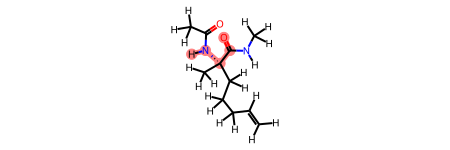

In [110]:
mol

In [1]:
from prep import build_molecule_from_smiles
from get_QM_energy import get_xyz_fromrdkitmol, run_qm_dih_PES
import matplotlib.pyplot as plt 
smile = "CNC(=O)[C@H](CCC[C@@H](NC(C)=O)C(=O)NC)NC(C)=O"
mol, res_type, backbone_list, capping_list = build_molecule_from_smiles(smile)
xyz = get_xyz_fromrdkitmol(mol)
print(backbone_list)

PES= run_qm_dih_PES(xyz ,basis = "HF/6-31G" , optimise=True)




Treating your residue as a stapled residue
SP2
SP2
((0, 1, 21, 22, 23, 24), (2, 3, 4, 17, 41), (5, 6, 7, 26, 27, 28, 29, 30, 31), (8, 9, 13, 14, 33), (10, 11, 12, 34, 35, 36), (15, 16, 37, 38, 39, 40), (18, 19, 20, 42, 43, 44), (25,), (32,))
[2, 3, 4, 17, 41]
[0, 1, 21, 22, 23, 24, 15, 16, 37, 38, 39, 40, 18, 19, 20, 42, 43, 44, 25]
[2, 3, 4, 17, 41, 8, 9, 13, 14, 33]
Scanning 0

 
 HERE


Time Veff  : 0.8672778850013856

 
 HERE


Time Veff  : 0.8928110319975531

 
 HERE


Time Veff  : 0.8333410659979563

 
 HERE


Time Veff  : 0.8989485619968036

 
 HERE


Time Veff  : 0.8040643240092322

 
 HERE


Time Veff  : 0.808741649001604

 
 HERE


Time Veff  : 0.815394496996305

 
 HERE


Time Veff  : 0.8031423369975528

 
 HERE


Time Veff  : 0.815066779992776

 
 HERE


Time Veff  : 0.8020162239990896

 
 HERE


Time Veff  : 0.7957970339921303

 
 HERE


Time Veff  : 0.8190982060041279

 
 HERE


Time Veff  : 0.8097084089968121

 
 HERE




: 

: 

In [50]:
import parmed
structure=parmed.load_file("mol.prmtop")

from train_model import *

class IntegerConstraint():
    def __call__(self, parameter):
        return torch.round(parameter)

def assign_sign_phase(i):
    if 179.0<i< 181.0 :return -1
    elif -1<i< 1:return 1
    else :raise Exception


class StructureModifier():
    def __init__(self, structure: parmed.Structure):
        super().__init__()
        self.structure = structure
        self.per = torch.tensor([dih.per for dih in self.structure.dihedral_types] ), 
        self.phi_k = torch.tensor([dih.phi_k for dih in self.structure.dihedral_types] ) 
        self.phase = torch.tensor([dih.phase for dih in self.structure.dihedral_types]) 

        self.phi_k_phase = nn.Paratorch.mul(self.phi_k, torch.tensor(list(map(assign_sign_phase, self.phase))))
        print(self.phi_k_phase)

        self.quant = torch.ao.quantization.QuantStub()
        self.dequant = torch.ao.quantization.DeQuantStub()


neural_module = StructureModifier(structure)

tensor([-2.5000, -1.5000,  0.0000,  0.0700,  0.1000, -1.7000, -2.0000, -0.0000,
         0.1556,  0.8000, -0.8500,  2.0000, -0.0800, -0.2000, -0.2500,  0.1800,
         0.1600,  0.5300, -0.1500, -0.5000,  0.1500, -1.1000])


In [4]:
import torch
import torch.nn as nn
from torch.quantization import QuantStub, DeQuantStub, quantize_dynamic
import pickle as pkl 

data = pkl.load( open("5_points.pkl" , "rb"))
print(data[0])
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.quant = torch.ao.quantization.QuantStub()

        self.dequant = torch.ao.quantization.DeQuantStub()
        self.fc1 = nn.Linear(784, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        x = self.quant(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.dequant(x)
        return x
x_coordinates= [d[1] for d in data]
energies =  [d[0] for d in data]
model =MyModel()

model.train()

model.eval()

(-642378.7254510615, array([[ -9.06338558,  -4.48620877,   4.74633696],
       [ -6.80348615,  -3.67437115,   3.43172846],
       [ -6.76308793,  -1.57896233,   1.99074155],
       [ -8.61363691,  -0.33351994,   1.56526728],
       [ -4.17806763,  -0.82605511,   0.94980411],
       [ -2.68306058,   0.57099923,   3.02994529],
       [ -0.11744231,   1.60656998,   2.19465365],
       [  1.810632  ,  -0.43851103,   1.50508773],
       [  3.98680484,   0.55086666,  -0.14482186],
       [  5.79322518,   2.06016594,   1.24225315],
       [  5.81119538,   4.61317551,   1.13975084],
       [  8.09458755,   5.87279775,   2.30608421],
       [  4.13993799,   5.82852074,   0.19760123],
       [  5.40172176,  -1.65012754,  -1.36901188],
       [  7.48138941,  -2.26386785,  -0.67512102],
       [  4.12795334,  -2.83602086,  -3.21312713],
       [  5.17059972,  -4.97311702,  -4.55804509],
       [ -4.60482332,   0.707394  ,  -1.27276148],
       [ -3.28204338,   0.46250816,  -3.42758532],
       [ -

MyModel(
  (quant): QuantStub()
  (dequant): DeQuantStub()
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [2]:
from get_QM_energy import run_some_conf
import matplotlib.pyplot as plt
from prep import build_molecule_from_smiles
smile = "CNC(=O)[C@H](CCC[C@@H](NC(C)=O)C(=O)NC)NC(C)=O"
mol, res_type, backbone_list, capping_list = build_molecule_from_smiles(smile)    

data = run_some_conf(mol=mol , n_confs=5 ,optimise=False)

Treating your residue as a stapled residue
SP2
SP2
((0, 1, 21, 22, 23, 24), (2, 3, 4, 17, 41), (5, 6, 7, 26, 27, 28, 29, 30, 31), (8, 9, 13, 14, 33), (10, 11, 12, 34, 35, 36), (15, 16, 37, 38, 39, 40), (18, 19, 20, 42, 43, 44), (25,), (32,))
[2, 3, 4, 17, 41]
[0, 1, 21, 22, 23, 24, 15, 16, 37, 38, 39, 40, 18, 19, 20, 42, 43, 44, 25]


/Users/Marie/Projects/2023-03-QMparam/Stapline/FFgenerationpipeline/get_QM_energy.py:99: FutureWarning: Using `psi4.set_module_options(<module>, {<key>: <val>})` instead of `psi4.set_options({<module>__<key>: <val>})` is deprecated, and as soon as 1.5 it will stop working

  psi4.set_module_options(



 
 HERE


Time Veff  : 4.273960203994648

 
 HERE


Time Veff  : 3.445685037993826

 
 HERE


Time Veff  : 3.3514554529974703

 
 HERE


Time Veff  : 3.3423762440070277

 
 HERE


Time Veff  : 3.9601495810056804

 
 HERE


Time Veff  : 3.4134061410004506

 
 HERE


Time Veff  : 3.8428103720070794

 
 HERE


Time Veff  : 3.1003057019988773

 
 HERE


Time Veff  : 3.2786657939868746

 
 HERE


Time Veff  : 3.0281126800109632

 
 HERE


Time Veff  : 2.7731924800027627

 
 HERE


Time Veff  : 3.5112135050003417

 
 HERE


Time Veff  : 3.3336792519985465

 
 HERE


Time Veff  : 3.7427462829946307

 
 HERE


Time Veff  : 2.167669743997976

 
 HERE


Time Veff  : 2.122794833005173

 
 HERE


Time Veff  : 2.14979764301097

 
 HERE


Time Veff  : 2.1101202409918187

 
 HERE


Time Veff  : 2.079605602004449

 
 HERE


Time Veff  : 2.1255837159988005

 
 HERE


Time Veff  : 2.0153206510003656

 
 HERE


Time Veff  : 2.022675528001855

 
 HERE


Time Veff  : 2.0538264170027105

 
 HERE


Time Vef

/Users/Marie/Projects/2023-03-QMparam/Stapline/FFgenerationpipeline/get_QM_energy.py:99: FutureWarning: Using `psi4.set_module_options(<module>, {<key>: <val>})` instead of `psi4.set_options({<module>__<key>: <val>})` is deprecated, and as soon as 1.5 it will stop working

  psi4.set_module_options(



 
 HERE


Time Veff  : 5.316294397998718

 
 HERE


Time Veff  : 3.849981569001102

 
 HERE


Time Veff  : 3.55221802800952

 
 HERE


Time Veff  : 3.644231561003835

 
 HERE


Time Veff  : 3.4486664949945407

 
 HERE


Time Veff  : 3.4392674989940133

 
 HERE


Time Veff  : 3.5562733550032135

 
 HERE


Time Veff  : 3.0155508479947457

 
 HERE


Time Veff  : 3.580679221995524

 
 HERE


Time Veff  : 3.489844821000588

 
 HERE


Time Veff  : 3.4715147099923342

 
 HERE


Time Veff  : 3.6286081669968553

 
 HERE


Time Veff  : 3.8411118570074905

 
 HERE


Time Veff  : 3.767649767003604

 
 HERE


Time Veff  : 3.5788852900004713

 
 HERE


Time Veff  : 3.3913528809935087

 
 HERE


Time Veff  : 3.6335033340001246

 
 HERE


Time Veff  : 3.871239717991557

 
 HERE


Time Veff  : 3.9410447040136205

 
 HERE


Time Veff  : 4.268432003998896

 
 HERE


Time Veff  : 4.473470929995528

 
 HERE


Time Veff  : 3.512836651003454

 
 HERE


Time Veff  : 3.791360702001839

 
 HERE


Time Veff  : 

/Users/Marie/Projects/2023-03-QMparam/Stapline/FFgenerationpipeline/get_QM_energy.py:99: FutureWarning: Using `psi4.set_module_options(<module>, {<key>: <val>})` instead of `psi4.set_options({<module>__<key>: <val>})` is deprecated, and as soon as 1.5 it will stop working

  psi4.set_module_options(



 
 HERE


Time Veff  : 4.4198477280006045

 
 HERE


Time Veff  : 4.363941714997054

 
 HERE


Time Veff  : 4.1578253930056235

 
 HERE


Time Veff  : 4.485775189998094

 
 HERE


Time Veff  : 4.763563676999183

 
 HERE


Time Veff  : 4.682877358995029

 
 HERE


Time Veff  : 4.764547587008565

 
 HERE


Time Veff  : 4.639216402996681

 
 HERE


Time Veff  : 4.029491168999812

 
 HERE


Time Veff  : 4.461892555002123

 
 HERE


Time Veff  : 4.248046556007466

 
 HERE


Time Veff  : 4.011162250986672

 
 HERE


Time Veff  : 3.917316070990637

 
 HERE


Time Veff  : 3.7423919959983323

 
 HERE


Time Veff  : 4.016915297994274

 
 HERE


Time Veff  : 3.8853891189937713

 
 HERE


Time Veff  : 3.415152086992748

 
 HERE


Time Veff  : 4.186849704012275

 
 HERE


Time Veff  : 3.9782667719991878

 
 HERE


Time Veff  : 4.052046465003514

 
 HERE


Time Veff  : 4.452594140006113

 
 HERE


Time Veff  : 5.581982336996589

 
 HERE


Time Veff  : 5.476593605999369

 
 HERE


Time Veff  : 4.754

/Users/Marie/Projects/2023-03-QMparam/Stapline/FFgenerationpipeline/get_QM_energy.py:99: FutureWarning: Using `psi4.set_module_options(<module>, {<key>: <val>})` instead of `psi4.set_options({<module>__<key>: <val>})` is deprecated, and as soon as 1.5 it will stop working

  psi4.set_module_options(



 
 HERE


Time Veff  : 3.917351455995231

 
 HERE


Time Veff  : 3.1456475330051035

 
 HERE


Time Veff  : 2.9938770919980016

 
 HERE


Time Veff  : 3.117955209003412

 
 HERE


Time Veff  : 3.1288737370050512

 
 HERE


Time Veff  : 3.0283061649970477

 
 HERE


Time Veff  : 2.5319026799988933

 
 HERE


Time Veff  : 2.7332346309995046

 
 HERE


Time Veff  : 2.683213418989908

 
 HERE


Time Veff  : 2.428110408000066

 
 HERE


Time Veff  : 2.3247875290107913

 
 HERE


Time Veff  : 2.2305085779953515

 
 HERE


Time Veff  : 2.5296847759891534

 
 HERE


Time Veff  : 2.650543679992552

 
 HERE


Time Veff  : 2.940774610004155

 
 HERE


Time Veff  : 2.7616585709911305

 
 HERE


Time Veff  : 2.582683051994536

 
 HERE


Time Veff  : 2.6716638060024707

 
 HERE


Time Veff  : 2.5383487380022416

 
 HERE


Time Veff  : 2.2913987490028376

 
 HERE


Time Veff  : 2.5341318269929616

 
 HERE


Time Veff  : 2.5527569289988605

 
 HERE


Time Veff  : 2.739864168994245

 
 HERE


Time Vef

/Users/Marie/Projects/2023-03-QMparam/Stapline/FFgenerationpipeline/get_QM_energy.py:99: FutureWarning: Using `psi4.set_module_options(<module>, {<key>: <val>})` instead of `psi4.set_options({<module>__<key>: <val>})` is deprecated, and as soon as 1.5 it will stop working

  psi4.set_module_options(



 
 HERE


Time Veff  : 3.3245400300074834

 
 HERE


Time Veff  : 2.511862586994539

 
 HERE


Time Veff  : 2.074916524012224

 
 HERE


Time Veff  : 2.787067635988933

 
 HERE


Time Veff  : 2.574388100008946

 
 HERE


Time Veff  : 2.723942608994548

 
 HERE


Time Veff  : 3.0181502110062866

 
 HERE


Time Veff  : 3.0442133140022634

 
 HERE


Time Veff  : 3.0294548390083946

 
 HERE


Time Veff  : 3.17104732900043

 
 HERE


Time Veff  : 3.0047203559952322

 
 HERE


Time Veff  : 2.399127780998242

 
 HERE


Time Veff  : 2.8234250180103118

 
 HERE


Time Veff  : 2.538982492987998

 
 HERE


Time Veff  : 2.4203717360069277

 
 HERE


Time Veff  : 2.9499705439957324

 
 HERE


Time Veff  : 3.031516101997113

 
 HERE


Time Veff  : 3.1233003410015954

 
 HERE


Time Veff  : 2.644081517995801

 
 HERE


Time Veff  : 2.8287650300044334

 
 HERE


Time Veff  : 2.7078431580011966

 
 HERE


Time Veff  : 2.584885561009287

 
 HERE


Time Veff  : 2.538006097995094

 
 HERE


Time Veff  : 

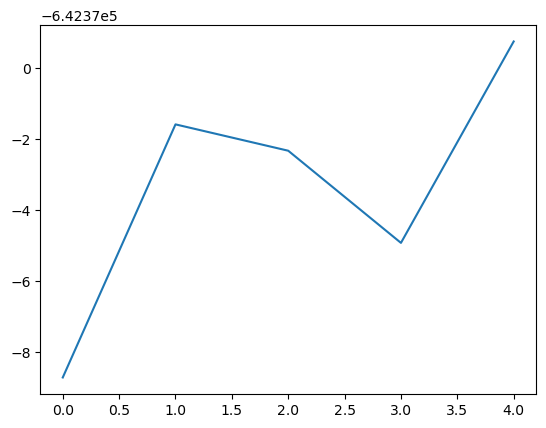

In [7]:
energy = [d[0] for d in data]
import matplotlib.pyplot as plt 
plt.plot(range(len(data)) , energy )
import pickle as pkl 
pkl.dump(data, open("5_points.pkl" , "wb"))


5_points.pkl


In [9]:
import rdkit
from rdkit import Chem
import parmed

# Create an RDKit molecule from a SMILES string
smiles = 'CC(=O)OC1=CC=CC=C1C(=O)OCC'
mol = Chem.MolFromSmiles(smiles)

# Convert the RDKit molecule to a ParmEd structure object
structure = parmed.rdkit.load_rdkit(mol)
parm = parmed.amber.AmberParm()



array([[ 1.94677170e+00,  1.43117153e+00,  9.64512369e-05],
       [ 1.61208867e-01,  1.31481473e+00, -6.07730477e-06],
       [-1.61208867e-01, -1.31481473e+00, -6.07730477e-06],
       [-1.94677170e+00, -1.43117153e+00,  9.64512369e-05]])

FileNotFoundError: my_structure.pdb does not exist


	cc-pVDZ SCF energy as a function of phi



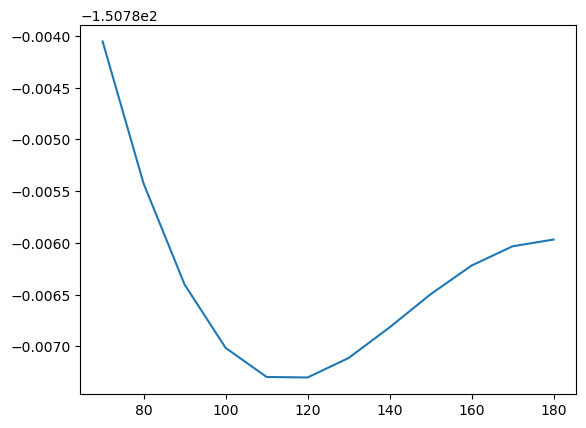

In [20]:
import matplotlib.pyplot as plt
print("\n\tcc-pVDZ SCF energy as a function of phi\n")
angles = [i[0] for i in PES]
energy = [i[1] for i in PES]
plt.plot(angles,energy)